<a href="https://colab.research.google.com/github/narasimha-17/Logistic-Regression/blob/main/customer_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install opendatasets --upgrade
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [11]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
od.download("https://www.kaggle.com/datasets/denisadutca/customer-behaviour")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: narasimha-17
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/denisadutca/customer-behaviour


100%|██████████| 3.27k/3.27k [00:00<00:00, 4.25MB/s]

In [29]:
df=pd.read_csv("/content/customer-behaviour/Customer_Behaviour.csv")

In [30]:
df.head(100)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
95,15709441,Female,35,44000,0
96,15710257,Female,35,25000,0
97,15582492,Male,28,123000,1
98,15575694,Male,35,73000,0


In [31]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


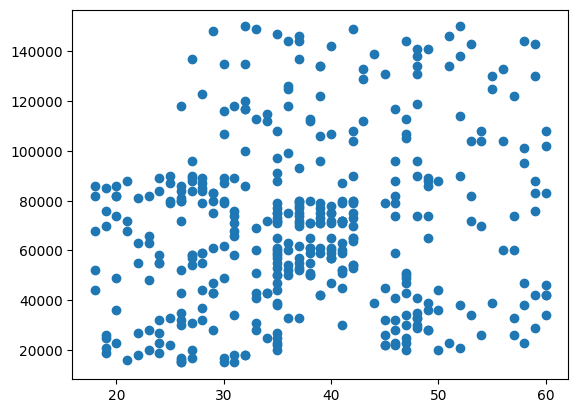

In [32]:
plt.scatter(df["Age"],df["EstimatedSalary"])

In [38]:
x_train=df[["Age","EstimatedSalary"]]
y_train=df["Purchased"]

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)

In [42]:
x_train

,Age,EstimatedSalary
250,44,39000
351,37,75000
39,27,31000
390,48,33000
101,28,59000
...,...,...
370,60,46000
217,40,78000
29,31,18000
40,27,17000


In [43]:
x_test

,Age,EstimatedSalary
140,19,85000
185,31,66000
139,19,25000
252,48,134000
239,53,143000
...,...,...
122,40,75000
243,56,104000
195,34,43000
9,35,65000


In [44]:
y_train

,Purchased
250,0
351,0
39,0
390,1
101,0
...,...
370,1
217,0
29,0
40,0


In [45]:
y_test

,Purchased
140,0
185,0
139,0
252,1
239,1
...,...
122,0
243,1
195,0
9,0


In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [52]:
from sklearn.linear_model import LogisticRegression


In [53]:
clf=LogisticRegression()
clf.fit(x_train,y_train)


LogisticRegression()

In [56]:
y_pred=clf.predict(x_test)

In [55]:
y_test

,Purchased
140,0
185,0
139,0
252,1
239,1
...,...
122,0
243,1
195,0
9,0


In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

In [61]:
!pip install mlxtend --upgrade

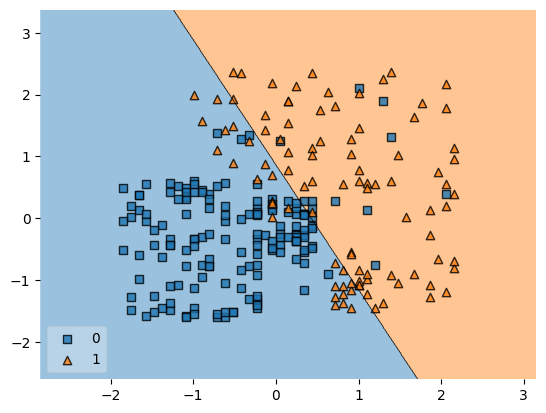

In [65]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.to_numpy(),clf=clf,legend=3)
plt.show()

In [68]:
import pickle
pickle.dump(clf,open("model.pkl","wb"))